<a href="https://colab.research.google.com/github/TasniaSharmin001/-FutureIntern_ML_01/blob/main/HPP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Courtesy:**  House Price Prediction using Machine Learning with Python | Machine Learning Project by
Siddhardhan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
hp_data=pd.read_csv("/content/drive/MyDrive/Internship_Future_Intern/House_Price_prediction/Housing.csv")
hp_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
hp_data['mainroad'] = hp_data['mainroad'].map({'yes': 1, 'no': 0})
hp_data['guestroom'] = hp_data['guestroom'].map({'yes': 1, 'no': 0})
hp_data['basement'] = hp_data['basement'].map({'yes': 1, 'no': 0})
hp_data['hotwaterheating'] = hp_data['hotwaterheating'].map({'yes': 1, 'no': 0})
hp_data['airconditioning'] = hp_data['airconditioning'].map({'yes': 1, 'no': 0})
hp_data['prefarea'] = hp_data['prefarea'].map({'yes': 1, 'no': 0})

# Convert furnishingstatus using label encoding
hp_data['furnishingstatus'] = hp_data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [ ]:
hp_data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0


In [ ]:
hp_data.shape

(545, 13)

In [ ]:
hp_data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
hp_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


Understanding the correlation between various features in the dataset
Positive Correlation

Negative Correlation

In [ ]:
correlation=hp_data.corr()

<Axes: >

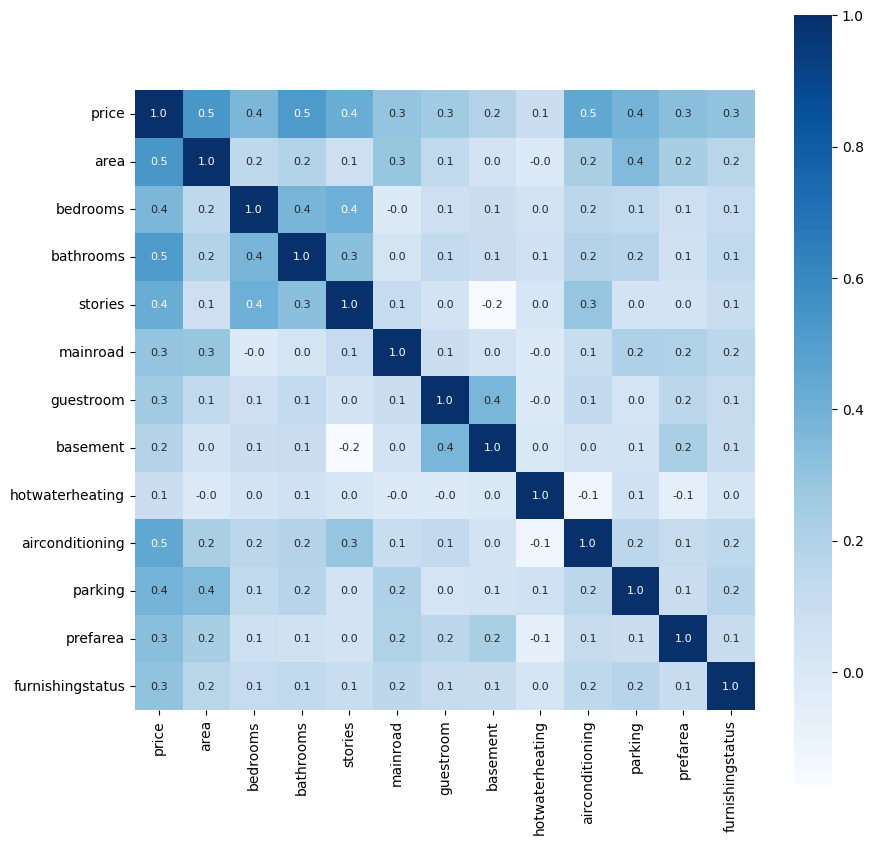

In [ ]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
X =hp_data.drop(['price'], axis=1)
Y =hp_data['price']
print(X)
print(Y)


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(545, 12) (490, 12) (55, 12)


**Model Training**

**XGBoost Regressor**

In [ ]:
# loading the model
XGB_model = XGBRegressor()
# training the model with X_train
XGB_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
scores_5 = cross_val_score(XGB_model, X_train, Y_train, cv=5, scoring='r2')

In [ ]:
# Print each fold's score
print("R-squared scores for each fold: ", scores_5)

# Print the average R-squared score
print("Average R-squared score: ", scores_5.mean())

R-squared scores for each fold:  [0.54092598 0.58788276 0.39385927 0.58986378 0.3211596 ]
Average R-squared score:  0.48673827648162843


In [ ]:
scores_6 = cross_val_score(XGB_model, X_test, Y_test, cv=5, scoring='r2')
# Print each fold's score
print("R-squared scores for each fold: ", scores_6)

# Print the average R-squared score
print("Average R-squared score: ", scores_6.mean())

R-squared scores for each fold:  [ 0.79709601 -0.97180569  0.06242657  0.20968044  0.55410528]
Average R-squared score:  0.13030052185058594


**Evaluation**

In [ ]:
# accuracy for prediction on training data
training_data_prediction = XGB_model.predict(X_train)
print(training_data_prediction)

[ 5077088.   6508551.   5452895.5  3607448.5  4779235.   4880348.5
  5518969.   3483551.5  7519545.   2825152.8  5489237.5  8668875.
  4102783.8  4193262.   4988518.5  3333629.5  6234340.5  4154855.8
  6649258.   3878467.   4607123.5  1984660.8  6446907.   1791646.4
  3657486.   3333629.5  4993770.5  4588876.   3883189.   3523122.5
  5980420.   3737394.   4840914.5  3598413.8  4425235.   3518800.2
  6298108.   3424119.2  3791922.5  3910776.2 12252194.   3166314.
  9300898.   4267786.5  3803772.5  5651039.5  3305730.   2387473.2
  4735839.   6671120.5  5517826.5  4071896.   3129249.   5522576.
  1825522.5  3008230.   2483748.   2764995.2  4528035.   4392617.
  4598027.5  5241867.   2612366.8  3638234.   9811103.   2956148.8
  6086831.   3417595.5  4909687.   3085457.   3028510.5  6924267.
  3566372.8  5891306.   3516734.8  4152023.8  3729836.5  4029505.5
  2612366.8  4484141.5 10128774.   3641923.   2688526.5  2249168.8
  2483748.   4281125.   6179011.5  6261630.   4125686.2  7509922.
 

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [ ]:
print("Training R squared error : ", score_1)
print('Training Mean Absolute Error : ', score_2)

Training R squared error :  0.9965627789497375
Training Mean Absolute Error :  61155.74464285714


**Visualizing the actual Prices and predicted prices**

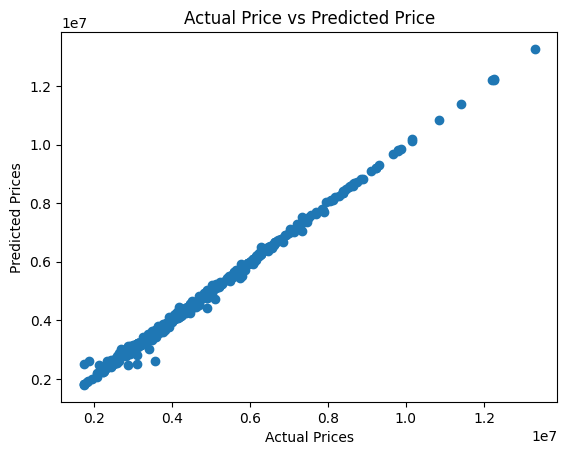

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

**Prediction on Test Data**

In [ ]:
# accuracy for prediction on test data
test_data_prediction = XGB_model.predict(X_test)

In [ ]:
# R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("Testing R squared error : ", score_3)
print('Testing Mean Absolute Error : ', score_4)

Testing R squared error :  0.4846716523170471
Testing Mean Absolute Error :  798634.1863636364


In [ ]:
from sklearn.metrics import mean_absolute_error

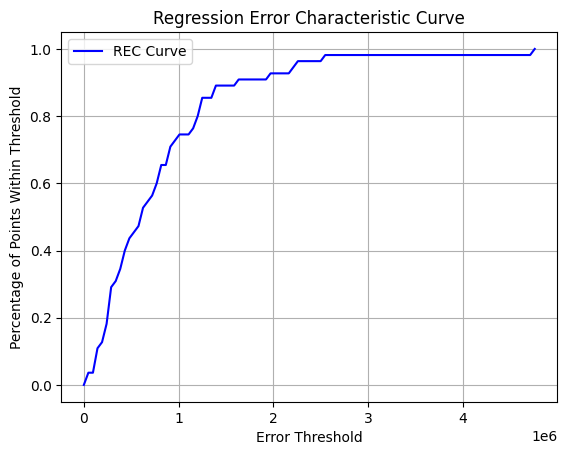

In [ ]:
# Calculate residuals (absolute errors)
errors = np.abs(Y_test-test_data_prediction)

# Generate REC curve data
thresholds = np.linspace(0, max(errors), num=100)
percentage_within_threshold = [(errors <= t).mean() for t in thresholds]

# Plot the REC curve
plt.figure()
plt.plot(thresholds, percentage_within_threshold, color="b", label="REC Curve")
plt.title("Regression Error Characteristic Curve")
plt.xlabel("Error Threshold")
plt.ylabel("Percentage of Points Within Threshold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

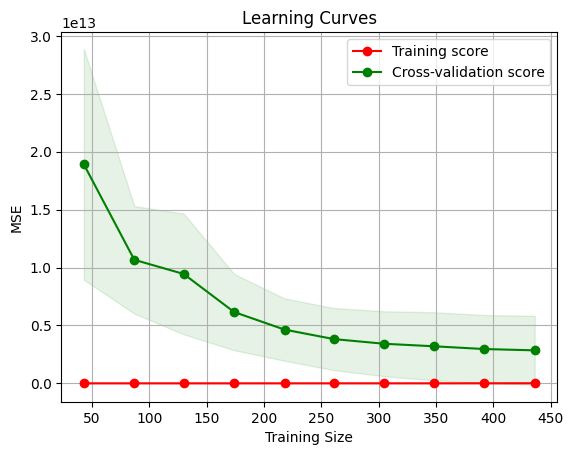

In [ ]:
# Generate learning curves
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    XGB_model, X, Y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curves
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.grid(True)
plt.show()